<h3>Import Libraries</h3>


In [1]:
# Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

<h3>Reading Dataset</h3>

In [3]:
# Reading Given Dataset "ch00_B0833-45_20150612_191438_011_3.txt"
df = pd.read_csv('/content/ch00_B0833-45_20150612_191438_011_1.txt', delim_whitespace=True, header=None,names=["North_A", "South_A"])

volt=df.copy(deep=False) #Creating copy of given dataset
#rows = volt.shape[0]
#cols = volt.shape[1]
#print(volt.head(5))
volt.describe()

,North_A,South_A
count,1.925993e+07,1.925993e+07
mean,3.485487e+00,7.745960e-01
std,2.805619e+01,2.995323e+01
min,-1.280000e+02,-1.280000e+02
25%,-1.600000e+01,-2.000000e+01
50%,4.000000e+00,1.000000e+00
75%,2.300000e+01,2.100000e+01
max,1.270000e+02,1.270000e+02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19259931 entries, 0 to 19259930
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   North_A  int64  
 1   South_A  float64
dtypes: float64(1), int64(1)
memory usage: 293.9 MB


<h3>Section 1: The voltage time series</h3>

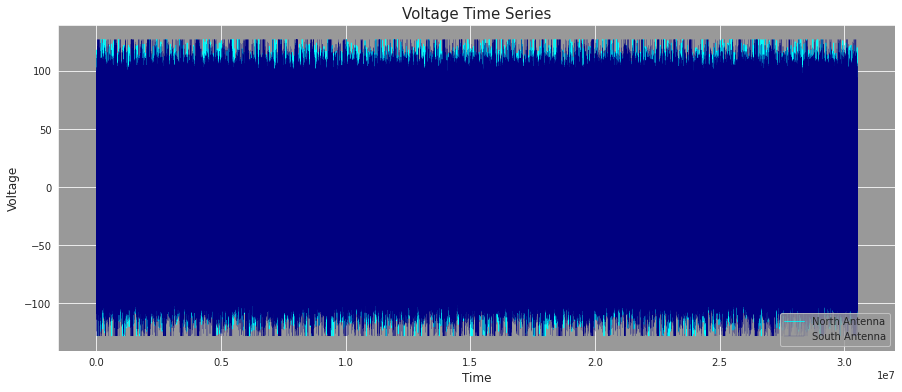

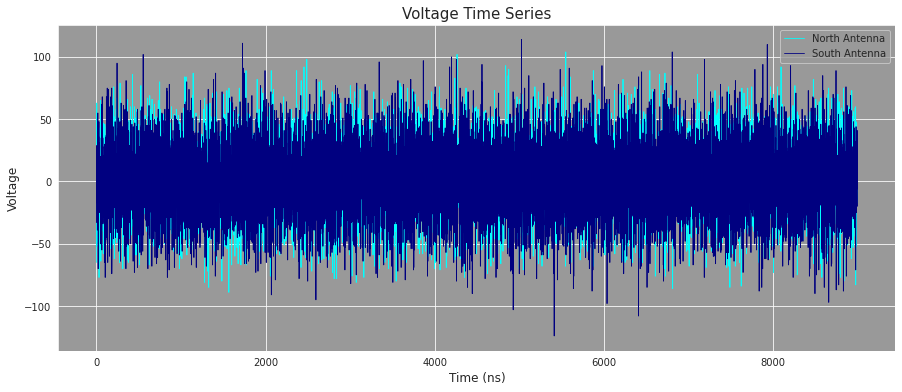

In [ ]:
# (1.1) The voltage time series
sns.set_style("darkgrid", {"axes.facecolor": ".6"})
plt.figure(figsize=(15,6))
plt.plot(volt["North_A"], color='cyan', label='North Antenna',linewidth=0.81)
plt.plot(volt["South_A"], color='navy', label='South Antenna',linewidth=0.15)
plt.ylabel("Voltage",fontsize=12)
plt.xlabel("Time",fontsize=12)
plt.title("Voltage Time Series",fontsize=15)
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,6))
plt.plot(volt["North_A"].head(9000), color='cyan', label='North Antenna',linewidth=0.81)
plt.plot(volt["South_A"].head(9000), color='navy', label='South Antenna',linewidth=0.81)
plt.ylabel("Voltage",fontsize=12)
plt.xlabel("Time (ns)",fontsize=12)
plt.title("Voltage Time Series",fontsize=15)
plt.legend(loc='best')
plt.show()

In [ ]:
"""
# (1.2) Plot the voltage histograms for the two antennas
#--------------------PDF: Using In-Built Function--------------------------
sns.set_style("darkgrid",{"axes.facecolor": ".81"})
plt.figure(figsize=(15,6))
volt["North_A"].plot(kind='hist', density=True, bins=30, color='cyan', edgecolor='dimgrey', alpha=0.6)
sns.kdeplot(volt["North_A"],bw_adjust=7, cut=0)
plt.ylabel("Probablity Distribution",fontsize=15)
plt.xlabel("Voltage (North Antenna)",fontsize=15)
plt.title("Gaussian Distribution for Voltages (North Antenna)",fontsize=21)
plt.show()
"""

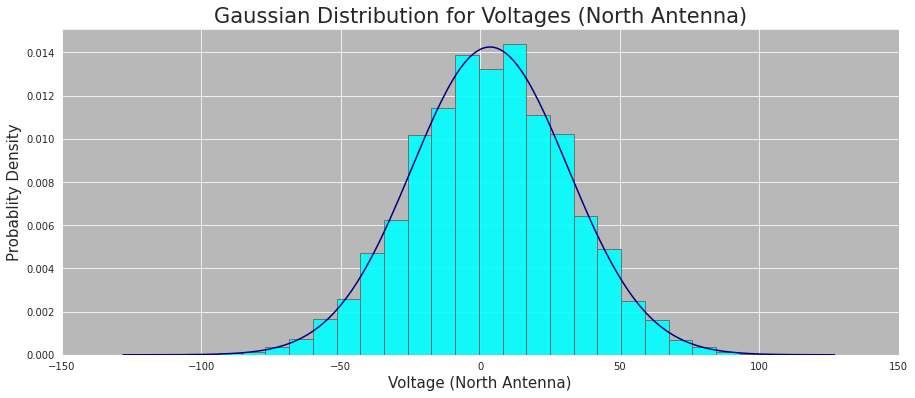

In [ ]:
# (1.2) Plot the voltage histograms for the two antennas
#--------------------PDF: Using Gaussian Probability Distribution for Noise Voltage--------------------------
sns.set_style("darkgrid",{"axes.facecolor": ".72"})

def normal_dist(x , mean , sd): # Function for Probability Density Function
    prob_density = (1/(math.sqrt(2*np.pi)*sd)) * (np.exp(-pow(x-mean,2)/(2*pow(sd,2))))
    return prob_density

# Mean and Standard Deviation 
mean=np.mean(volt["North_A"])
std=np.std(volt["North_A"])

#Apply function to the data.
PDF = normal_dist(volt["North_A"],mean,std)

# Adding PDF as new column to copy dataset 'volt'
volt["PDF"]=pd.DataFrame(PDF)
#print(volt.head(4))

#Plot
plt.figure(figsize=(15,6))
volt["North_A"].plot(kind='hist', bins=30, density=True, color='cyan', edgecolor='dimgrey', alpha=0.9)
plt.plot(np.sort(volt["North_A"]),volt['PDF'][np.argsort(volt["North_A"])],color = 'navy', label="Pobability Density Function")
plt.xlim(-150, 150)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Voltage (North Antenna)",fontsize=15)
plt.title("Gaussian Distribution for Voltages (North Antenna)",fontsize=21)
plt.show()

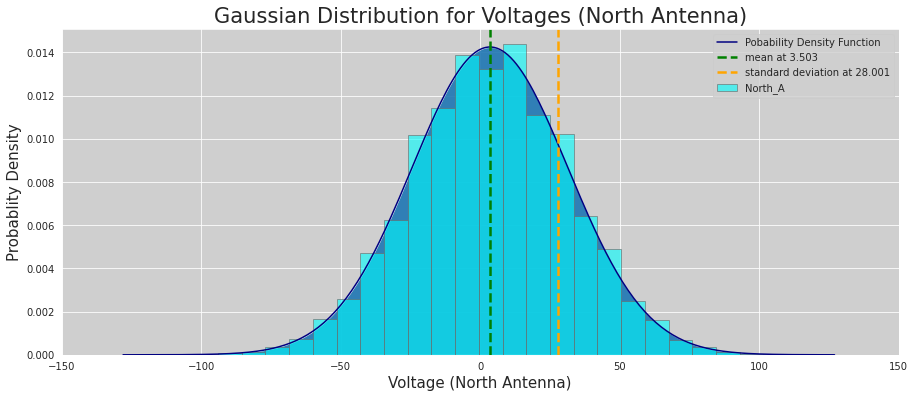

In [ ]:
sns.set_style("darkgrid",{"axes.facecolor": ".81"})
plt.figure(figsize=(15,6))
volt["North_A"].plot(kind='hist', bins=30, density=True, color='cyan', edgecolor='dimgrey', alpha=0.6)
plt.plot(np.sort(volt["North_A"]),volt['PDF'][np.argsort(volt["North_A"])],color = 'navy', label="Pobability Density Function")
plt.xlim(-150, 150)
plt.fill_between(np.sort(volt["North_A"]),volt['PDF'][np.argsort(volt["North_A"])], alpha=0.9)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Voltage (North Antenna)",fontsize=15)
plt.title("Gaussian Distribution for Voltages (North Antenna)",fontsize=21)

measurements = [round(volt["North_A"].mean(),3),round(volt["North_A"].std(),3)]
names = ["mean", "standard deviation"]
colors = ['green', 'orange']

for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
    #axvline() function of matplotlib library is used to add a vertical line across the axes of the plot. Add a vertical line across the axes.
plt.legend()
plt.show()

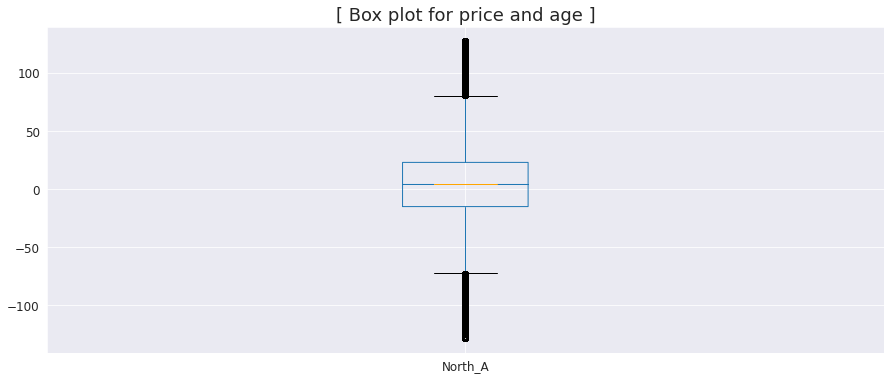

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
volt.boxplot(column=["North_A"],notch ='True',fontsize=12,color={'medians': 'orange'})
plt.yticks(fontsize=12)
plt.title("[ Box plot for price and age ]",fontsize=18)
plt.show()


Number of records which are noise free: 30342498
No. of rows in uncleaned and cleaned data respectively:  30530072 and 30342498


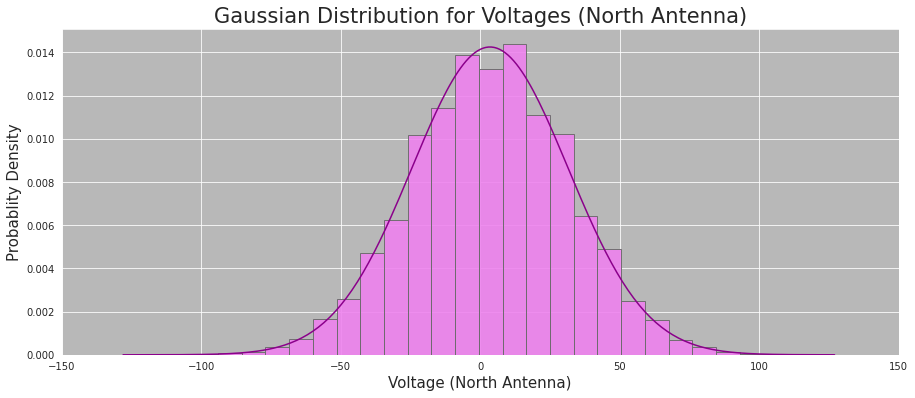

In [ ]:
new_volt=pd.DataFrame()   

#for i in df.columns:
Q1, Q3 = np.nanpercentile(df["North_A"],[25,75])
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)
new_volt["North_A"]=df["North_A"][(df["North_A"]>=lower_bound) & (df["North_A"]<=upper_bound)]

print("\nNumber of records which are noise free: ", end="")
print(new_volt.dropna().shape[0]) 

for i in new_volt.columns:   
  standard=round((new_volt[i]).mean(),2) 
  new_volt[i].fillna(standard,inplace=True)

print("No. of rows in uncleaned and cleaned data respectively: ", volt.shape[0] ,"and",new_volt.shape[0])
#new_volt.info()
#-------------------------------------------------------------------------------

sns.set_style("darkgrid",{"axes.facecolor": ".72"})

def normal_dist(x , mean , sd): # Function for Probability Density Function
    prob_density = (1/(math.sqrt(2*np.pi)*sd)) * (np.exp(-pow(x-mean,2)/(2*pow(sd,2))))
    return prob_density

# Mean and Standard Deviation 
mean=np.mean(volt["North_A"])
std=np.std(volt["North_A"])

#Apply function to the data.
PDF = normal_dist(volt["North_A"],mean,std)

# Adding PDF as new column to copy dataset 'volt'
volt["PDF"]=pd.DataFrame(PDF)
#print(volt.head(4))

#Plot
plt.figure(figsize=(15,6))
volt["North_A"].plot(kind='hist', bins=30, density=True, color='violet', edgecolor='dimgrey', alpha=0.9)
plt.plot(np.sort(volt["North_A"]),volt['PDF'][np.argsort(volt["North_A"])],color = 'darkmagenta', label="Pobability Density Function")
plt.xlim(-150, 150)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Voltage (North Antenna)",fontsize=15)
plt.title("Gaussian Distribution for Voltages (North Antenna)",fontsize=21)
plt.show()

In [ ]:
power=np.square(df)

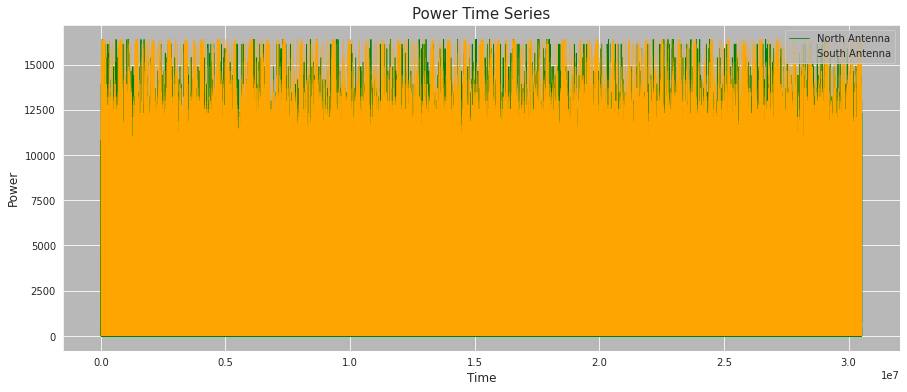

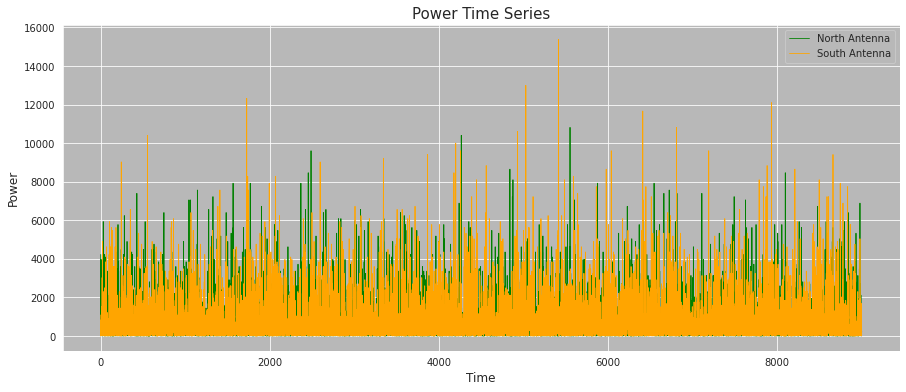

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": ".72"})
plt.figure(figsize=(15,6))
plt.plot(power["North_A"], color='green', label='North Antenna',linewidth=0.81)
plt.plot(power["South_A"], color='orange', label='South Antenna',linewidth=0.15)
plt.ylabel("Power",fontsize=12)
plt.xlabel("Time",fontsize=12)
plt.title("Power Time Series",fontsize=15)
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,6))
plt.plot(power["North_A"].head(9000), color='green', label='North Antenna',linewidth=0.81)
plt.plot(power["South_A"].head(9000), color='orange', label='South Antenna',linewidth=0.81)
plt.ylabel("Power",fontsize=12)
plt.xlabel("Time",fontsize=12)
plt.title("Power Time Series",fontsize=15)
plt.legend(loc='best')
plt.show()

In [ ]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530072 entries, 0 to 30530071
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   North_A  int64
 1   South_A  int64
dtypes: int64(2)
memory usage: 465.9 MB


In [5]:
#--------------------PDF: Using Gaussian Probability Distribution for Noise Voltage--------------------------

def normal_dist(x , mean , sd): # Function for Probability Density Function
    prob_density = (1/(math.sqrt(2*np.pi*pow(x,2))*sd)) * (np.exp(-pow(x,2)/(2*pow(sd,2)))) 
    return prob_density

# Mean and Standard Deviation 
mean=np.mean(power["North_A"])
std=np.std(power["North_A"])

#Apply function to the data.
PDF = normal_dist(power["North_A"],mean,std)

# Adding PDF as new column to copy dataset 'power'
power["PDF"]=pd.DataFrame(PDF)
print(power.head(4))

print("Mean: ", mean)
#Plot
plt.figure(figsize=(15,6))
power["North_A"].plot(kind='hist', bins=30, density=True, color='orange', edgecolor='dimgrey', alpha=0.9)
plt.plot(np.sort(power["North_A"]),power['PDF'][np.argsort(power["North_A"])],color = 'green', label="Pobability Density Function")
plt.xlim(0, 20000)
plt.ylabel("Probablity Density",fontsize=15)
plt.xlabel("Power (North Antenna)",fontsize=15)
plt.title("Probability Distribution for Power (North Antenna)",fontsize=21)
plt.show()

NameError: ignored

<h4>3.1: Choose frequency and time binning parameters</h4>
<ul>
  <li>First we want to obtain the spectral composition of the time series. In order to find the spectral information, we select a small part of the time-series, take the Fourier series to convert it to the spectrum in that time range.</li>
  <li>The spectral information is obtained at the cost of time resolution (since FFT of voltage time samples gives the spectrum)</li>
  <li>For time-resolution $dt$, an $N-$point FFT will output the amplitude and phase of $N/2$ frequencies that contains information equivalent to the time-series</li>
  <li>The data can now be transformed to a time series of time bin-size $N\times dt$ but with a $N/2$-bins spectrum in each time bin</li>
  <li>The power spectral distribution is obtained by squaring the Fourier spectrum</li>
</ul>

In [ ]:
# Frequency and time binning parameters
Nf = pow(2,12)# Number of frequency bins; Choose a power of 2: 2^n (E.g., 64, 128, 256)
print('Chosen number of frequency bins = {0}'.format(Nf))
fmax = 16.5e6 # Equals the bandwidth upper-limit of 16.5 MHz
print('Total bandwidth of signal = {0:.1f} MHz'.format(fmax/1e6))
dt = 1/(33e6) # Time resolution of 1/(33 MHz) seconds
print('Time-resolution of voltage sampling = {0:.2f} nanosecond'.format(dt*1e9))

Chosen number of frequency bins = 4096
Total bandwidth of signal = 16.5 MHz
Time-resolution of voltage sampling = 30.30 nanosecond


In [ ]:
# For chosen frequency resolution,
print('----------FFT length-----------') # FFT - Fast Fourier Transform
df = fmax/Nf # Lowest frequency probed is equal to the chosen frequency resolution (Bandwidth by number of frequency bins)
print('Lowest frequency probed = {0:.2f} kHz'.format(df/1000))
Tmax = 1/df # Largest time-scale of variability probed is the inverse of the lowest frequency of interest
print('Largest time-scale of variability = {0:.2f} microseconds'.format(Tmax*1e6))
Nfft = Tmax/dt# Number of voltage samples to obtain FFT is the number of voltage samples that span the largest time-scale (of interest / probed)
print('Number of voltage samples to obtain FFT = ', Nfft)
#print('Number of voltage samples to obtain FFT = {0:d}'.format(Nfft))

----------FFT length-----------
Lowest frequency probed = 4.03 kHz
Largest time-scale of variability = 248.24 microseconds
Number of voltage samples to obtain FFT =  8192.0
